Deskripsi library


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

MEMANGGIL DATA SET

In [23]:
df = pd.read_excel('data 3 minol.xlsx')
df

,JENIS KELAMIN,IP S1,IP S2,IP S3,IP S4,IP S5,IP S6,IPK,LAMA STUDI
0,Laki-laki,3.74,3.93,3.89,3.69,3.82,4.00,3.83,3.00
1,Perempuan,3.73,3.95,3.83,3.81,3.62,3.89,3.80,3.00
2,Perempuan,3.56,2.95,3.53,3.15,3.29,3.64,3.34,3.00
3,Perempuan,3.94,3.99,3.83,3.83,3.75,3.93,3.88,3.00
4,Perempuan,3.66,3.32,3.06,3.33,3.21,3.89,3.40,3.00
...,...,...,...,...,...,...,...,...,...
561,Perempuan,3.35,3.47,3.51,3.74,3.68,3.93,3.60,3.08
562,Perempuan,3.61,3.28,3.54,3.44,3.49,3.82,3.51,3.08
563,Laki-laki,3.11,3.20,3.31,3.46,3.55,3.75,3.38,3.08
564,Perempuan,3.22,3.14,3.43,3.61,3.68,3.86,3.48,3.08


DESKRIPSI DATASET

<Axes: >

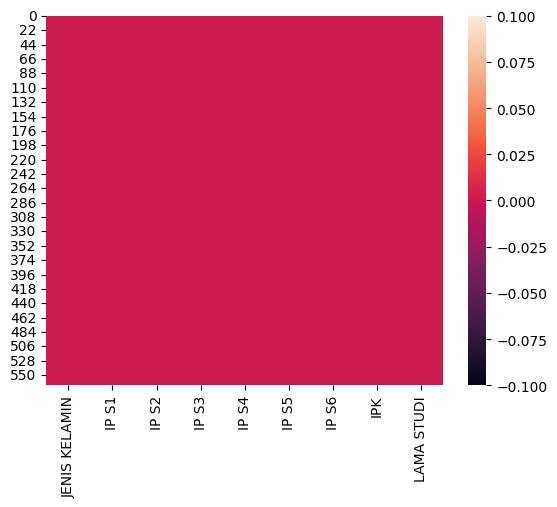

In [24]:
sns.heatmap(df.isnull())

In [25]:
df.isnull()


,JENIS KELAMIN,IP S1,IP S2,IP S3,IP S4,IP S5,IP S6,IPK,LAMA STUDI
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
561,False,False,False,False,False,False,False,False,False
562,False,False,False,False,False,False,False,False,False
563,False,False,False,False,False,False,False,False,False
564,False,False,False,False,False,False,False,False,False


In [26]:
df.describe()


,IP S1,IP S2,IP S3,IP S4,IP S5,IP S6,IPK,LAMA STUDI
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,3.316113,3.213021,3.206961,3.337032,3.439293,3.628057,3.511608,3.163251
std,0.395539,0.425923,0.386221,0.314676,0.283470,0.319484,0.293100,0.322959
min,2.180000,2.090000,2.060000,2.240000,2.180000,2.530000,2.660000,2.830000
25%,3.030000,2.910000,2.960000,3.150000,3.280000,3.470000,3.310000,3.000000
50%,3.350000,3.225000,3.230000,3.355000,3.470000,3.720000,3.530000,3.000000
75%,3.650000,3.537500,3.490000,3.570000,3.670000,3.860000,3.750000,3.080000
max,4.000000,4.000000,3.990000,4.480000,3.970000,4.000000,4.000000,5.080000


VISUALISASI DATASET

C:\Users\HP\AppData\Local\Temp\ipykernel_2620\127387827.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LAMA STUDI'])


<Axes: xlabel='LAMA STUDI', ylabel='Density'>

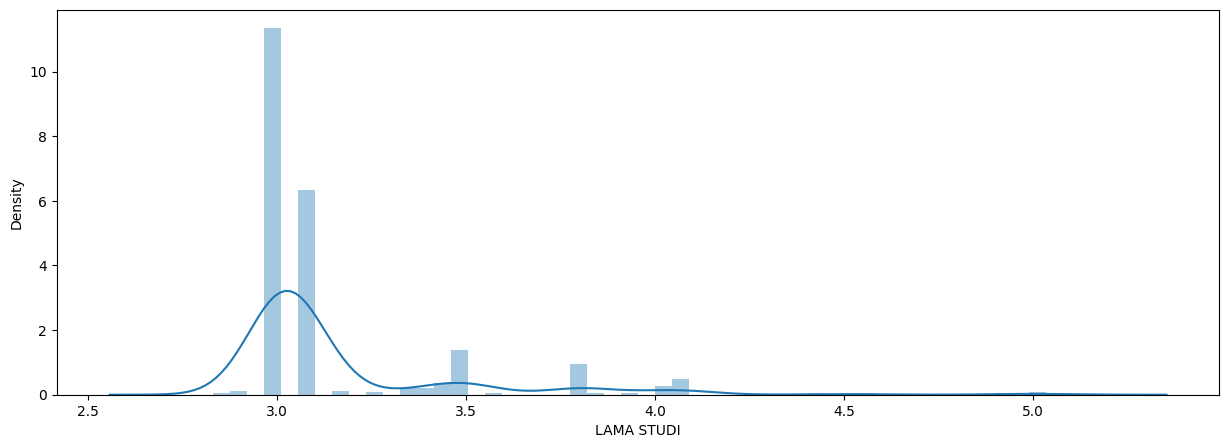

In [27]:
plt.figure(figsize=(15,5))
sns.distplot(df['LAMA STUDI'])


MELIHAT TIPE DATASET

In [28]:
df.dtypes


JENIS KELAMIN     object
IP S1            float64
IP S2            float64
IP S3            float64
IP S4            float64
IP S5            float64
IP S6            float64
IPK              float64
LAMA STUDI       float64
dtype: object

MERUBAH TIPE DATA OBJECT PADA KOLOM JENIS KELAMIN MENJADI BERTIPE DATA INTEGER

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['JENIS KELAMIN'] = labelencoder.fit_transform(df['JENIS KELAMIN'])

In [30]:
# Simpan label encoder setelah dilatih pada data pelatihan
import pickle

filename = 'label_encoder.pkl'
pickle.dump(labelencoder, open(filename,'wb'))

In [31]:
df.dtypes

JENIS KELAMIN      int32
IP S1            float64
IP S2            float64
IP S3            float64
IP S4            float64
IP S5            float64
IP S6            float64
IPK              float64
LAMA STUDI       float64
dtype: object

<Axes: >

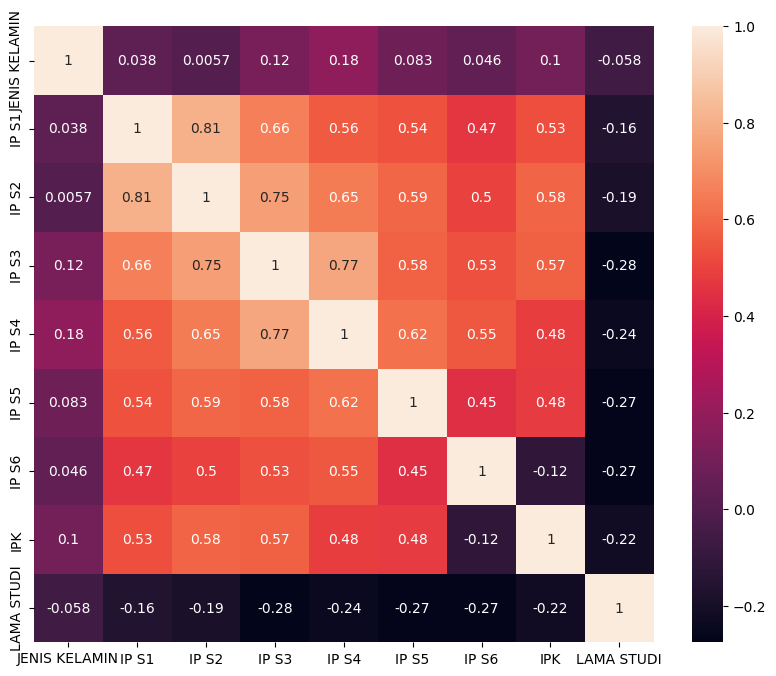

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

MEMBAGI DATA MENJADI DATA INPUT DAN DATA TARGET

In [33]:
x = df.iloc[:, :-1].values #data
y = df.iloc[:,-1].values #target

In [36]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

MENGINISIASI DATA TRAINING DAN DATA TESTING DENGAN PEMBAGIAN DATA 80:20

In [37]:
# Ridge regression
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print('LASSO Test MSE:', ridge_mse)

LASSO Test MSE: 0.08026722640653236


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_trainval, x_test, y_trainval, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size=0.25, random_state=42)

PEMBUATAN MODEL REGRESI RIDGE

MENYESUAIKAN MODEL

In [39]:
# Fit the Ridge Regression model
ridge = Ridge(alpha=0.1)  # Adjust the alpha value as needed
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

MENGEVALUASI MODEL MENGGUNAKAN MSE (MEAN SQUARE ERROR)

In [40]:
ridge_val_mse = mean_squared_error(y_val, ridge.predict(x_val))
ridge_test_mse = mean_squared_error(y_test, ridge.predict(x_test))
print("Ridge Regression:")
print("Validation MSE:", ridge_val_mse)
print("Test MSE:", ridge_test_mse)
print()

Ridge Regression:
Validation MSE: 0.08654376217968614
Test MSE: 0.07999949976787452



In [16]:
y_pred = ridge.predict(x_test)

In [17]:
print("Model Score: ", ridge.score(x_test, y_test))

Model Score:  0.20138230444578964


In [18]:
ridge.coef_

array([-0.01835944,  0.2437397 ,  0.11190695, -0.08158528,  0.19675699,
       -0.07820038, -0.56238419, -0.56896699])

In [97]:
import statsmodels.api as sm
ridge_model = Ridge(alpha=0.0)  # Adjust the alpha value as needed
ridge_model.fit(x_train, y_train)
X_train_with_bias = sm.add_constant(x_train)
sm_model = sm.OLS(y_train, X_train_with_bias)

# Melatih model statsmodels
sm_results = sm_model.fit()

# Menampilkan summary model
print(sm_results.summary())

# Menampilkan koefisien model
coefficients = sm_results.params

# Menampilkan koefisien untuk setiap fitur
for feature_name, coefficient in zip(x_train.columns, coefficients[1:]):
    print(f"{feature_name}: {coefficient}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     9.385
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           1.09e-11
Time:                        11:56:36   Log-Likelihood:                -68.315
No. Observations:                 339   AIC:                             154.6
Df Residuals:                     330   BIC:                             189.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9980      0.409     14.668      0.0

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

MENGHITUNG AKURASI MODEL REGRESI RIDGE

In [41]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(y_test, y_pred):
    mse = np.mean((y_test - y_pred) ** 2)
    accuracy = 1 / (1 + mse)*100
    return accuracy

accuracy = calculate_accuracy(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 92.59263547945449


MENCARI ALPHA TERBAIK DENGAN TEKNIK CV

In [20]:
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import warnings
warnings.filterwarnings('ignore')

model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid ['alpha'] = arange(0,1, 0.01)

search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1 )

results = search.fit(x, y)

print('MSE : %.3f' % results.best_score_)
print('Config : %s' % results.best_params_)

MSE : -0.089
Config : {'alpha': 0.62}


PERCOBAAN PREDIKSI

In [29]:
#Data ke-1 (3 tahun)
ridge_model = Ridge(alpha=0.62)
ridge_model.fit(x, y)
ridge_model.coef_
row = [2,3.15,3.26,3.33,3.51,3.51,3.42,3.82]
yhat = ridge.predict([row])
print('Predicted : %.3f' % yhat)


Predicted : 3.093


MENYIMPAN MODEL

In [103]:
import pickle

filename = 'data apk2.sav'
pickle.dump(ridge,open(filename,'wb'))

In [1]:
# Simpan label encoder setelah dilatih pada data pelatihan
import pickle

filename = 'label_encoder.pkl'
pickle.dump(labelencoder, open(filename,'wb'))

NameError: name 'labelencoder' is not defined